# Download the dataset from kaggle

Follow this tutorial to load directly from kaggle to google colab

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

https://www.kaggle.com/datasets/jr2ngb/cataractdataset

In [22]:
# from google.colab import drive
# drive.mount("/content/drive")

# !pip install kaggle

# !mkdir ~/.kaggle
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download jr2ngb/cataractdataset
# !unzip cataractdataset.zip

# Project

In [23]:
import numpy as np
normal = r"dataset\1_normal\NL_001.png"
cataract = r"dataset\2_cataract\cataract_001.png"
glaucoma = r"dataset\2_glaucoma\Glaucoma_001.png"
retina = r"dataset\3_retina_disease\Retina_001.png"

normal_dataset_path = r'dataset\1_normal\NL_'
cataract_dataset_path = r'dataset\2_cataract\cataract_'
glaucoma_dataset_path = r'dataset\2_glaucoma\Glaucoma_'
retina_dataset_path = r'dataset\3_retina_disease\Retina_'

file_normal = 301
file_cataract = 101
file_glaucoma = 102
file_retina = 101

width, height = 400, 400
distance = 10
teta = 90
data_eye = np.zeros((7, 785))
count = 0
indextable = ['dissimilarity', 'contrast', 'homogeneity', 'energy', 'ASM', 'correlation', 'Label']

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

## Visulization of Images

In [25]:
def get_image(path, color):
    img = cv.imread(path)
    img = cv.cvtColor(img, color)
    return img

In [26]:
def get_thresh_image(path):
    img = get_image(path, cv.COLOR_BGR2GRAY)
    img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3)
    return img

In [27]:
def show_image(path, color, cmap='gray'):
    img = get_image(path, color)
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

In [28]:
def show_image_threshold(path, cmap='gray'):
    img = get_thresh_image(path)
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

In [29]:
def get_contoured(img):
    cnts = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        img = img[y:y+h, x:x+w]
        break
    img = cv.resize(img, (int(img.shape[0]/4), int(img.shape[1]/4)))
    return img

In [30]:
def show_image_resized(path, cmap='gray'):
    img = get_thresh_image(path)
    img = get_contoured(img)

    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

In [31]:
# Code to extract features from Image using Gray Level Co occurrence Image
def get_feature(matrix, name):
    feature = graycoprops(matrix, name)
    result = np.average(feature)
    return result

In [32]:
from skimage.util.dtype import img_as_float
def show_features(path):
    img =  get_image(path, cv.COLOR_BGR2GRAY)
    glcm = graycomatrix(img, [distance], [teta], levels=256, symmetric=True, normed=True)
    
    for x in indextable[:-1]:
        arr = []
        feature = get_feature(glcm, x)
        arr.append(feature)
        print(f"{x} = {arr[0]}")

### Normal Eye

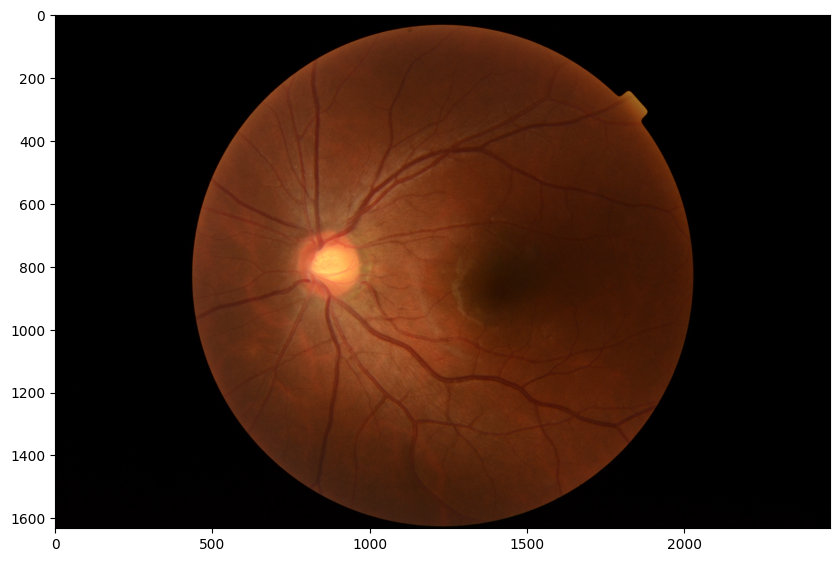

In [33]:
show_image(normal, cv.COLOR_BGR2RGB)

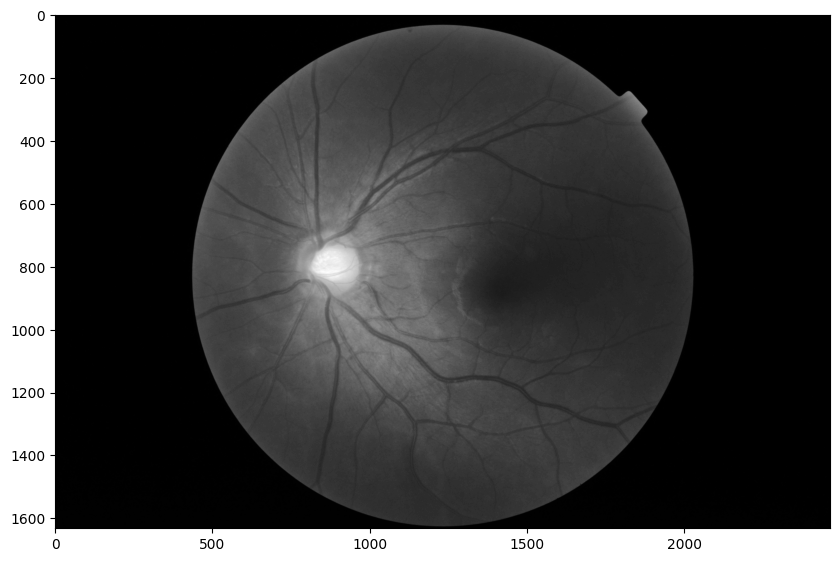

In [34]:
show_image(normal, cv.COLOR_BGR2GRAY)

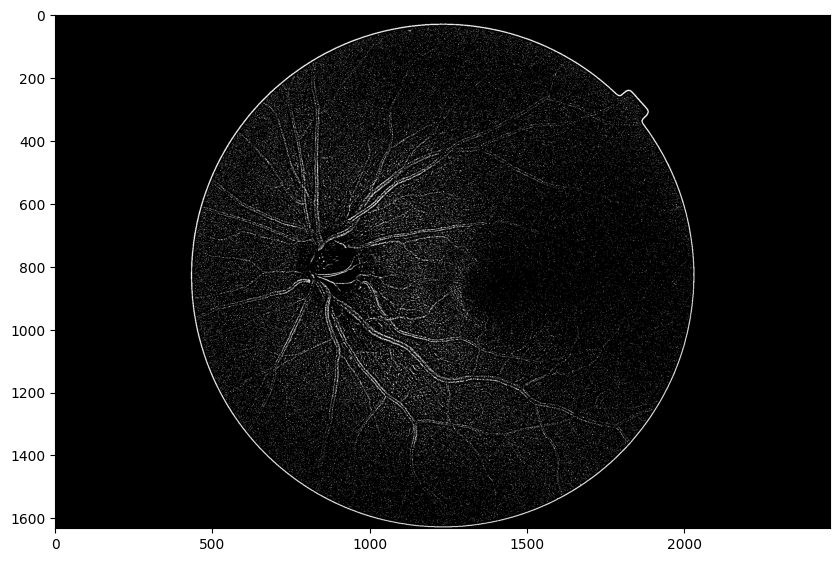

In [35]:
show_image_threshold(normal)

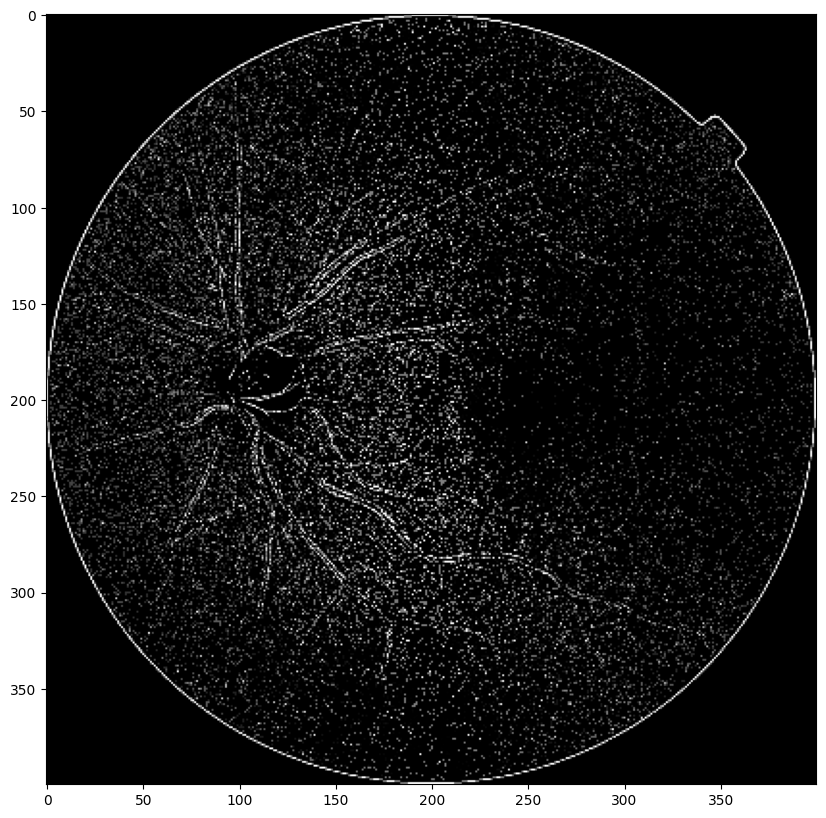

In [36]:
show_image_resized(normal)

In [37]:
show_features(normal)

dissimilarity = 2.359452784916019
contrast = 41.945021013980934
homogeneity = 0.576242193400139
energy = 0.3328517283882375
ASM = 0.11079027309103703
correlation = 0.9812819810957705


### Cataract Eye

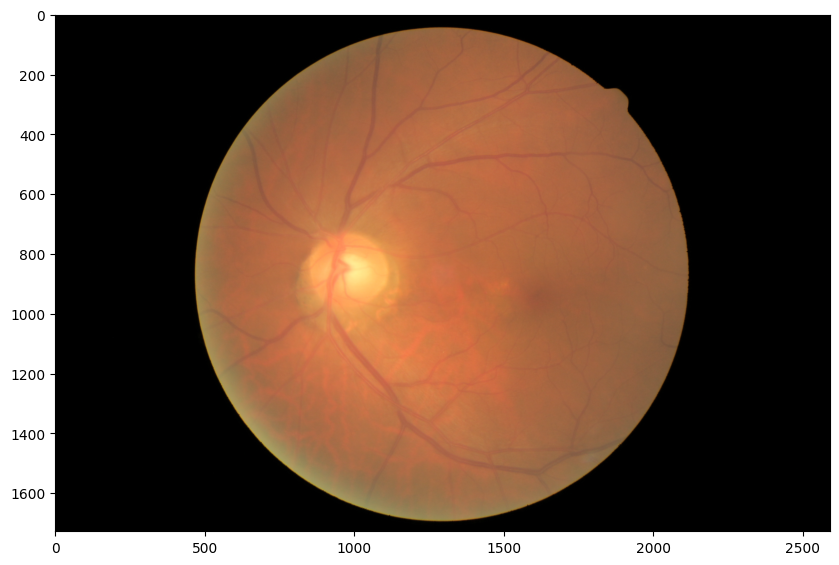

In [38]:
show_image(cataract, cv.COLOR_BGR2RGB)

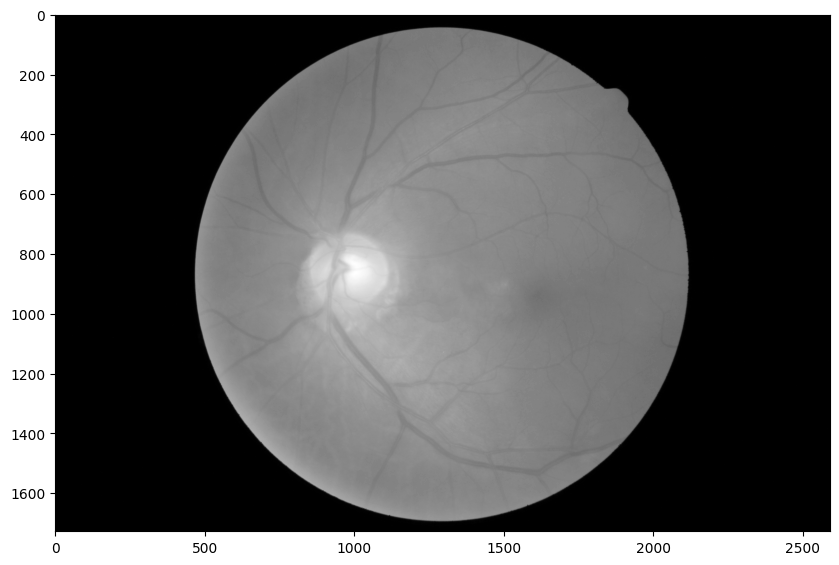

In [39]:
show_image(cataract, cv.COLOR_BGR2GRAY)

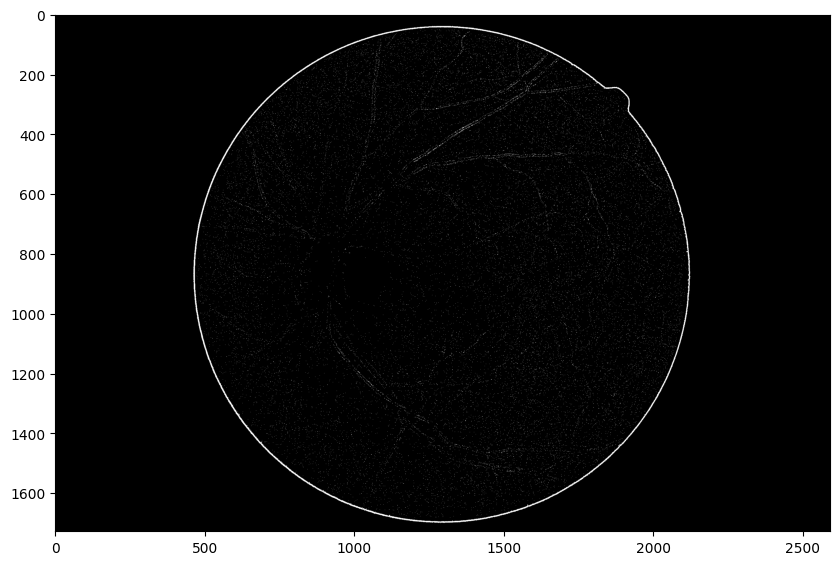

In [40]:
show_image_threshold(cataract)


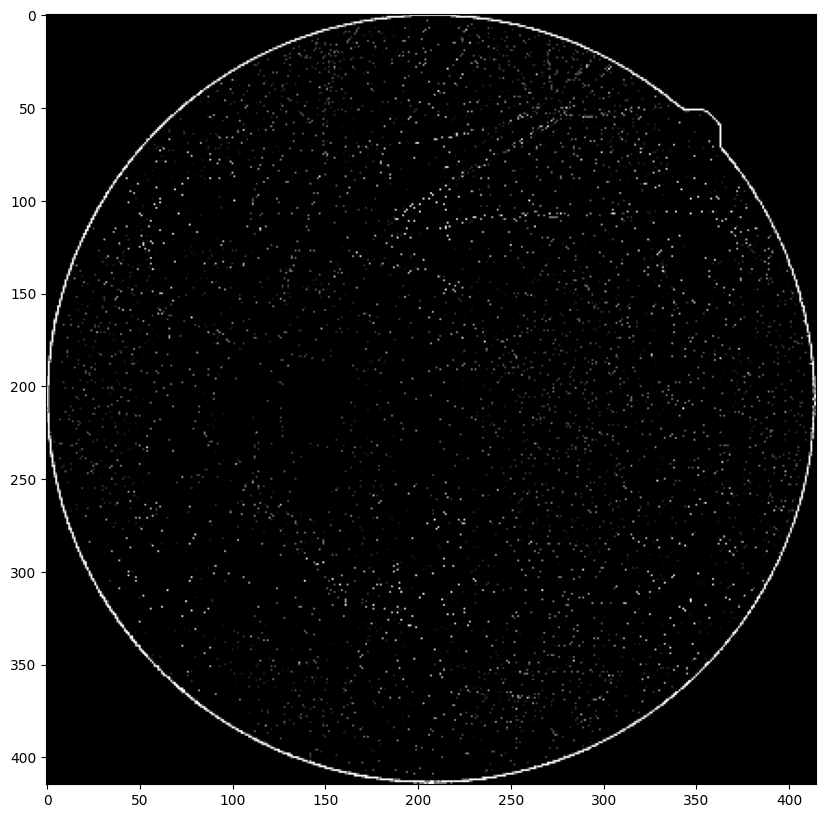

In [41]:
show_image_resized(cataract)

In [42]:
show_features(cataract)

dissimilarity = 2.1049734623397196
contrast = 91.53380640770081
homogeneity = 0.6010999055050785
energy = 0.3236216513540075
ASM = 0.1047309732250948
correlation = 0.9886393590130287


### Glaucoma Eye

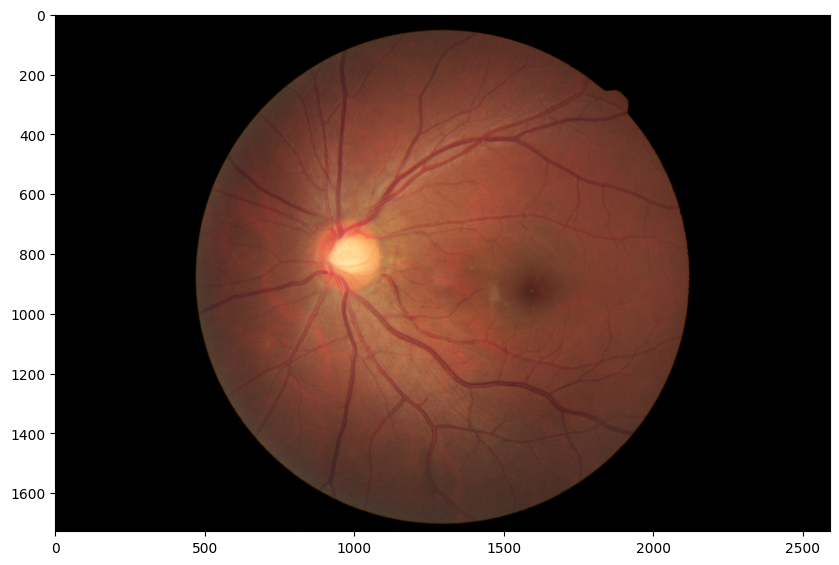

In [43]:
show_image(glaucoma, cv.COLOR_BGR2RGB)

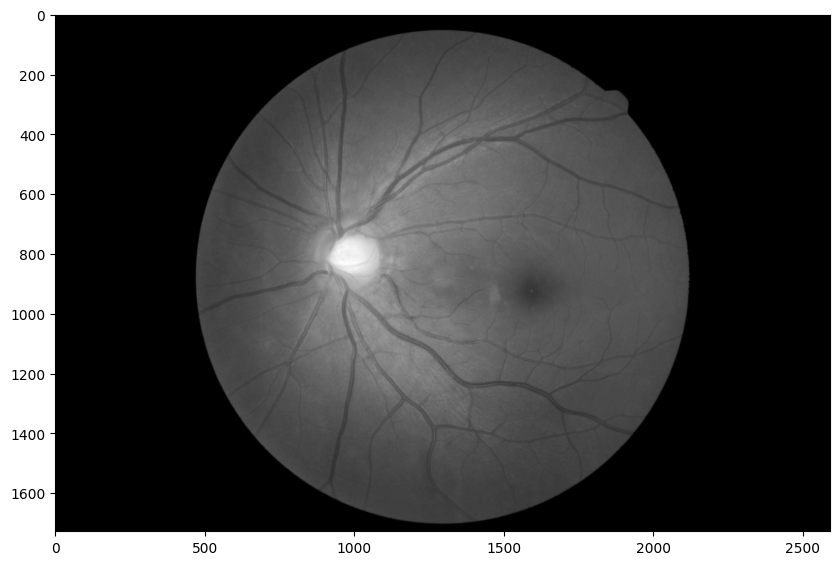

In [44]:
show_image(glaucoma, cv.COLOR_BGR2GRAY)

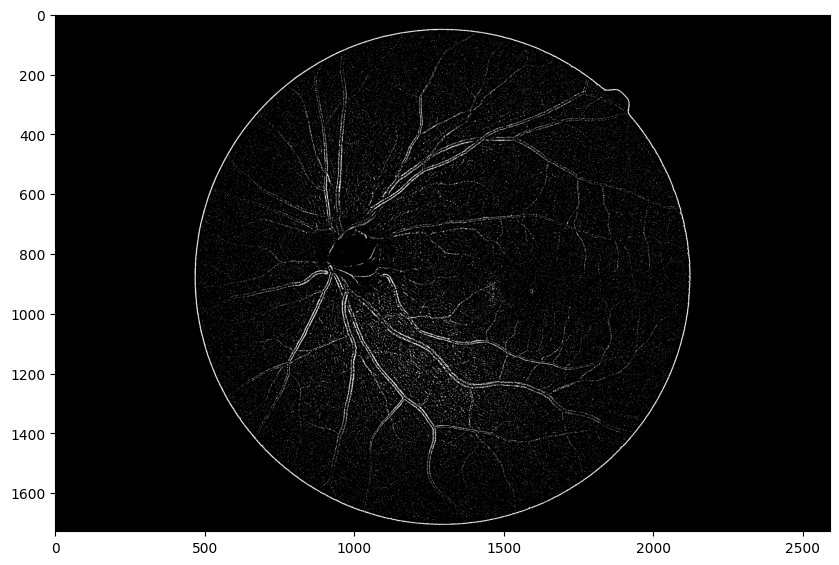

In [45]:
show_image_threshold(glaucoma)

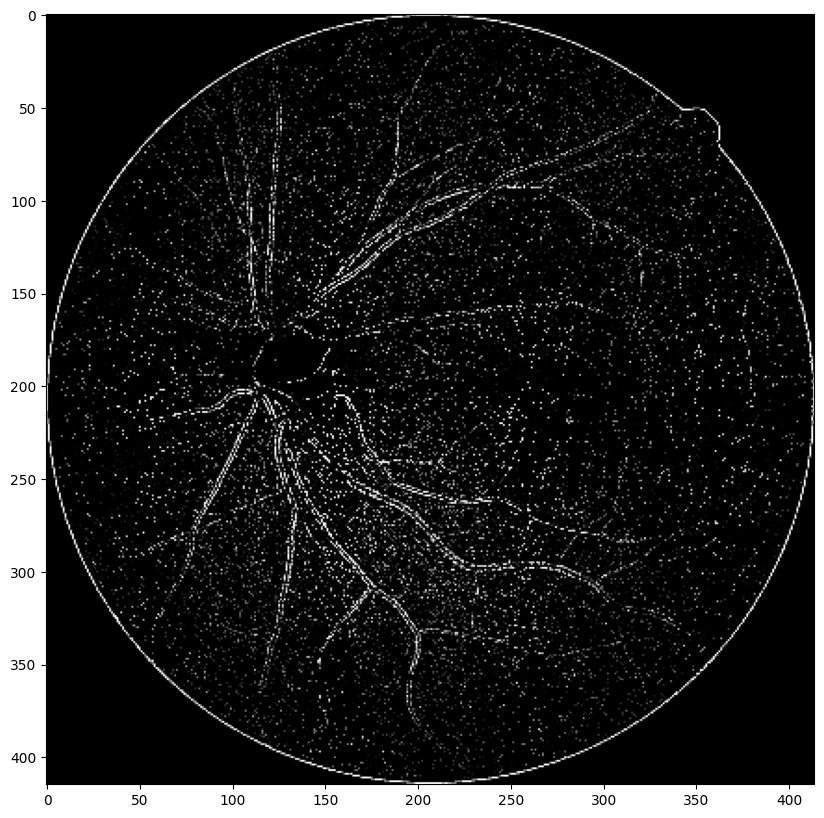

In [46]:
show_image_resized(glaucoma)

In [47]:
show_features(glaucoma)

dissimilarity = 2.3014861179669355
contrast = 35.28123738415904
homogeneity = 0.5711410230855922
energy = 0.35166736971650847
ASM = 0.12366993892332745
correlation = 0.9910168440371069


### Retina Disease Eye

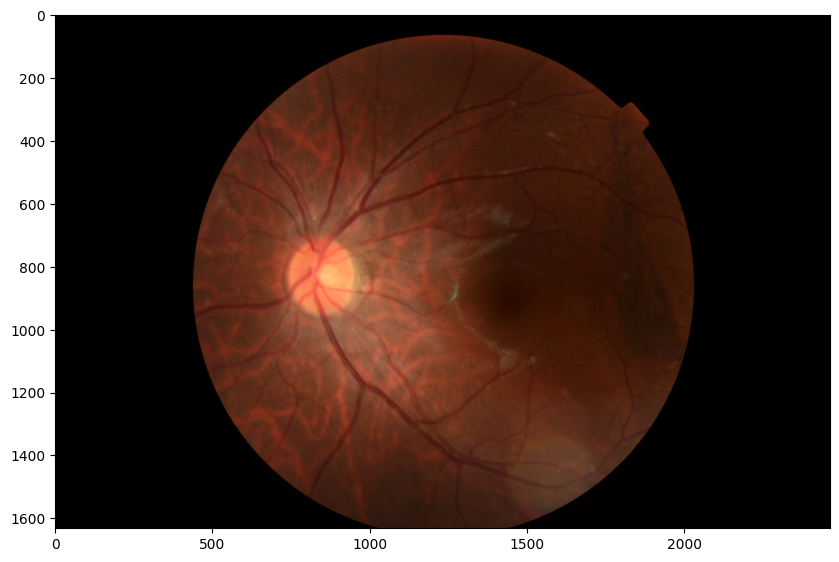

In [48]:
show_image(retina, cv.COLOR_BGR2RGB)

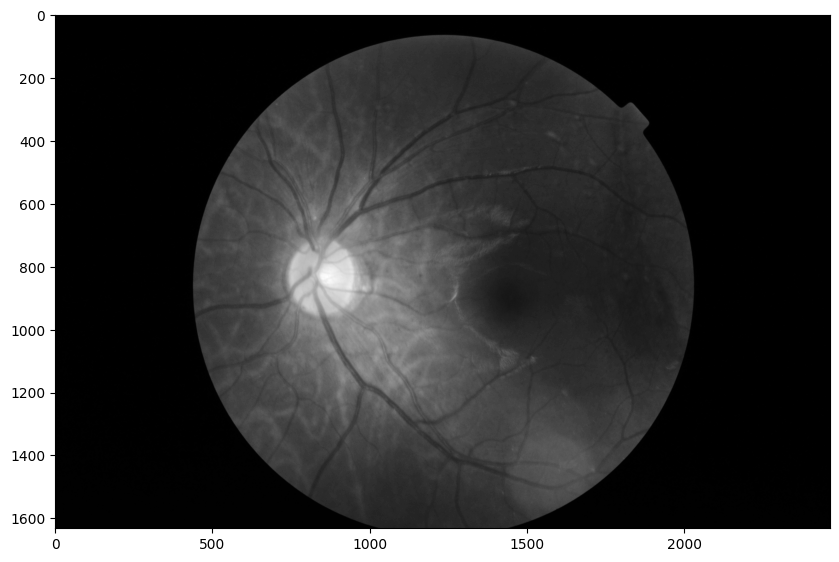

In [49]:
show_image(retina, cv.COLOR_BGR2GRAY)

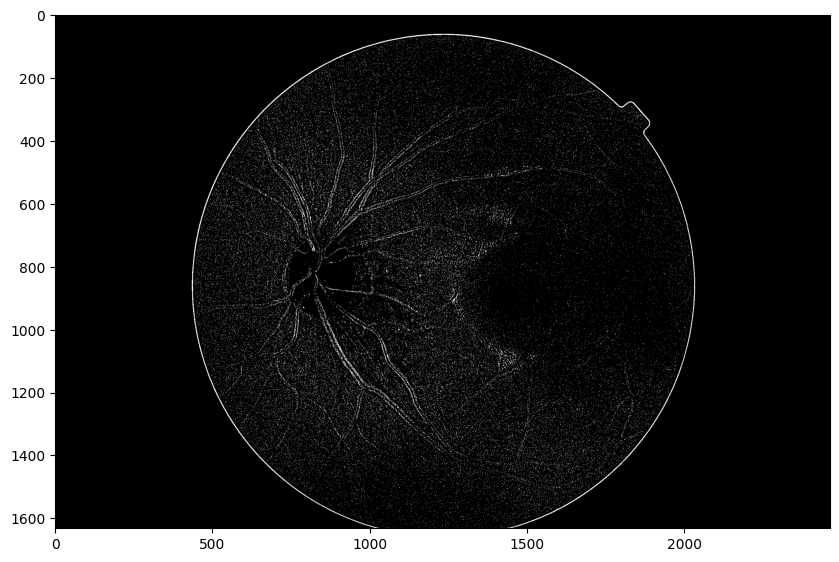

In [50]:
show_image_threshold(retina)

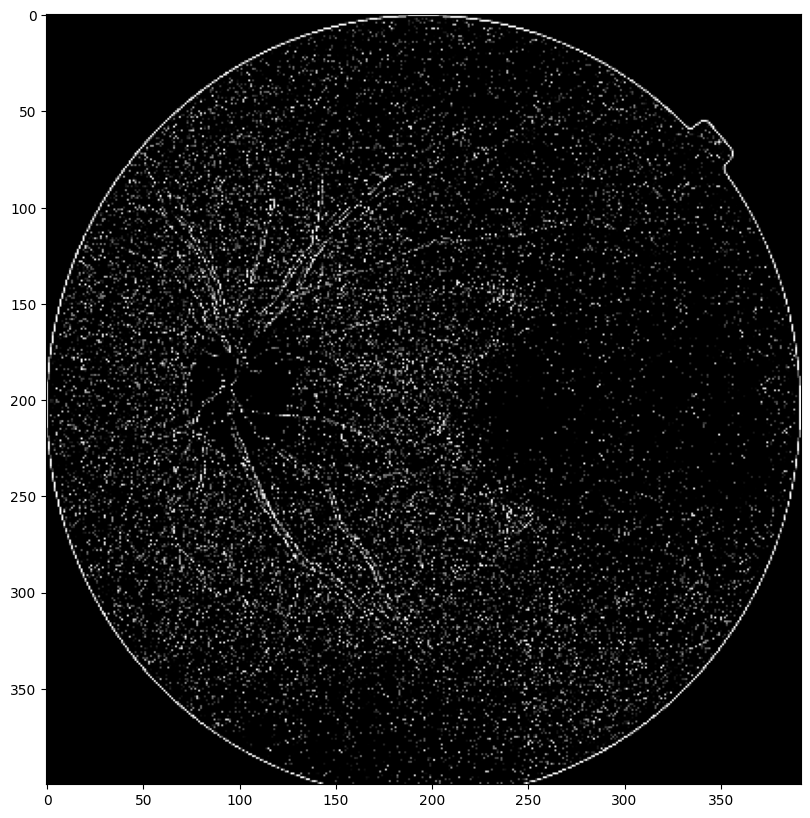

In [51]:
show_image_resized(retina)

In [52]:
show_features(retina)

dissimilarity = 2.268327497507876
contrast = 27.108430889299648
homogeneity = 0.5515220160371488
energy = 0.2797819614231953
ASM = 0.07827794593781032
correlation = 0.9881810702684163


## Data Augmenation

In [53]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import random
def augment_images(path, size):
    number = int(0.3 * size)
    for i in range(number):
        rand = random.randrange(1, size)
        imagePath = f'{path}{str(rand).zfill(3)}.png'
        image = Image.open(imagePath)
        image = image.filter(ImageFilter.GaussianBlur)
        image = image.save(f'{path}{size + i}.png')
    return size + number

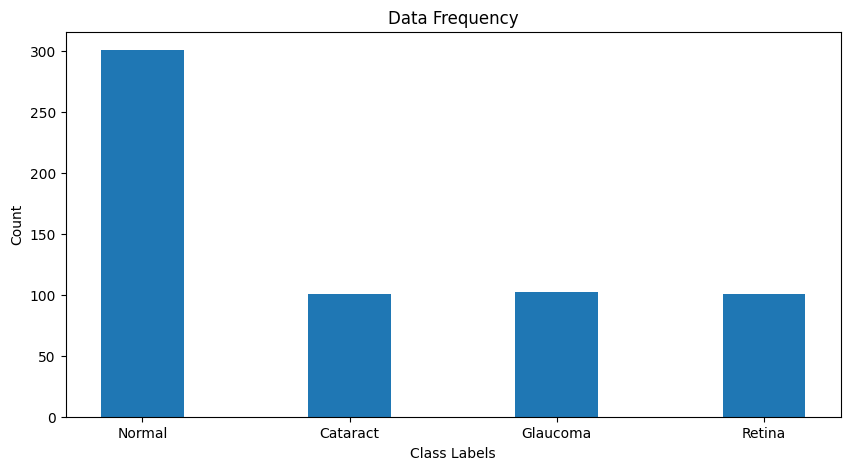

In [54]:
def graph(file_normal, file_cataract, file_glaucoma, file_retina):
    keys = ["Normal", "Cataract", "Glaucoma", "Retina"]
    values = [file_normal, file_cataract, file_glaucoma, file_retina]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(keys, values, width = 0.4)
    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.title("Data Frequency")
    plt.show()
graph(file_normal, file_cataract, file_glaucoma, file_retina)

In [55]:
file_normal = augment_images(normal_dataset_path, file_normal)
file_cataract = augment_images(cataract_dataset_path, file_cataract)
file_glaucoma = augment_images(glaucoma_dataset_path, file_glaucoma)
file_retina = augment_images(retina_dataset_path, file_retina)

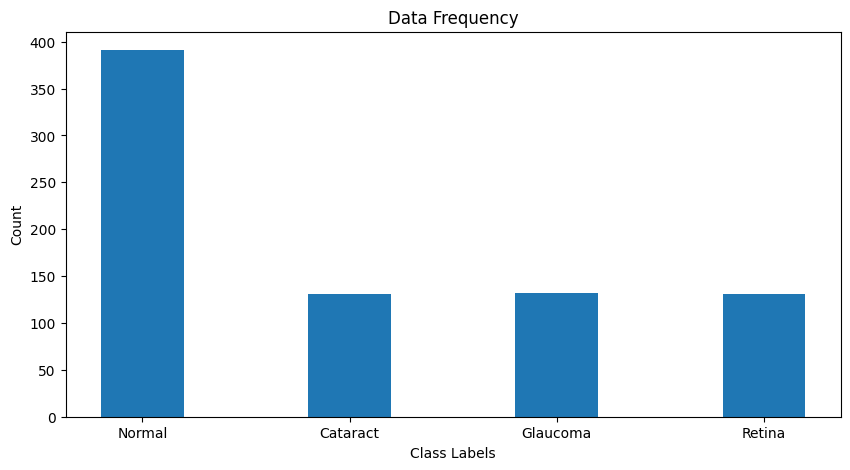

In [56]:
graph(file_normal, file_cataract, file_glaucoma, file_retina)

## Image Preprocessing and Feature Extraction

In [57]:
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x, y, w, h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
    
    return test_img_ROI_resize_gray

In [58]:
def populate(path, size, label):
    global count
    for file in range(1, size):
        image = cv.imread(f'{path}{str(file).zfill(3)}.png')
        img = preprocessingImage(image)
    
        glcm = graycomatrix(img, [distance], [teta], levels=256, symmetric=True, normed=True)
    
        for i in range(len(indextable[:-1])):
            features = []
            feature = get_feature(glcm, indextable[i])
            features.append(feature)
            data_eye[i, count] = features[0]
    data_eye[len(indextable) - 1, count] = label
    
    count = count + 1

In [ ]:
populate(normal_dataset_path, file_normal, 0)
populate(cataract_dataset_path, file_cataract, 1)
populate(glaucoma_dataset_path, file_glaucoma, 2)
populate(retina_dataset_path, file_retina, 3)

In [ ]:
data = pd.DataFrame(np.transpose(data_eye), columns = indextable)
data.to_csv("cataract_data.csv")
data.head()

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

In [ ]:
print(f"Length od our dataset : {len(data)}")

## Exploratory Data Analysis and Preprocessing

In [ ]:
data.describe()

## Machine Learning Models and Preprocessing

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,50,100]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
def test_model(X, y):
    scores = []

    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
        
    scores = sorted(scores, key= lambda x: x.best_score, reverse=True)
    
    df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    print(df_score)

In [ ]:
X = data.drop(['Label'], axis='columns')
y = data.Label
test_model(X, y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data.head()

In [ ]:
data.describe()

In [ ]:
X = data.drop(['Label'], axis='columns')
y = data.Label
test_model(X, y)